In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from sklearn.datasets import load_wine

# Load the wine data
wine = load_wine()
A = wine.data

# Number of classes
C = len(np.unique(wine.target))

In [3]:
normalized_A = np.zeros_like(A)
for i in range(A.shape[1]):

     normalized_A[:,i] = (A[:,i])/max(abs(A[:,i]))



In [4]:
n = wine.data.shape[0]  # Number of data points
d = wine.data.shape[1]  # Dimension of data points

# Create a nx1 vector of target labels
y = 1.0 * np.ones([A.shape[0], ])
for i in range(wine.target.shape[0]):
    y[i] = -1 if wine.target[i] != 1 else 1

# Create an index array
indexarr = np.arange(n)  # index array
np.random.shuffle(indexarr)  # shuffle the indices

# Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
train_size = int(0.8*n)

train_data = normalized_A[indexarr[:train_size]]
train_label = y[indexarr[:train_size]]
test_data = normalized_A[indexarr[train_size:]]
test_label = y[indexarr[train_size:]]

print("Train data shape:", train_data.shape)
print("Train label shape:", train_label.shape)
print("Test data shape:", test_data.shape)
print("Test label shape:", test_label.shape)

Train data shape: (142, 13)
Train label shape: (142,)
Test data shape: (36, 13)
Test label shape: (36,)


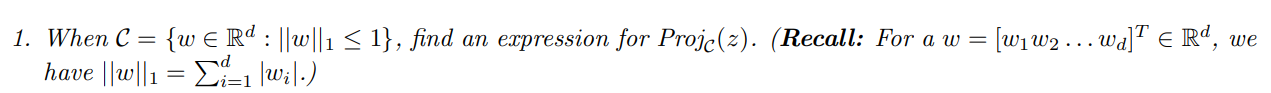

**The  expression for the projection $\operatorname{Proj}_C(z)$ onto this set would be:**
$$
\operatorname{Proj}_C(z)= \begin{cases}z & \text { if }\|z\|_1 \leq 1 \\ \frac{z}{\|z\|_1} & \text { if }\|z\|_1>1\end{cases}
$$

**2. Consider the hinge loss function L_h. Use the python modules developed in the last lab to compute the loss
function L_h, and objective function value. Also, use the modules developed in the last lab to compute the
gradient (or sub-gradient) of f_i(w) for the loss function Lh. Denote the (sub-)gradient by $g_i(w) = ∇wf_i(w)$.**


In [5]:
def hinge_loss(x,y,w):

  return np.maximum(0,1-y*w@x)

def obj_func(X,y,w,lamda):
  loss = 0
  for i in range(X.shape[0]):
    margin = hinge_loss(X[i],y[i],w)
    loss += margin
  reg_term = (lamda/2)*np.linalg.norm(w)**2
  return loss + reg_term

def grad_loss(x, y, w, lambda_val,n):

    margin = 1 - y *( w@x)
    if margin >= 0:
        loss_gradient = -y*x
    else:
        loss_gradient = 0
    regularization_gradient = (1/n)*lambda_val * w
    gradient = regularization_gradient + loss_gradient/n
    return gradient

def predict(w,x):

  predict=[]

  for i in range(x.shape[0]):
    w1 = w @x[i]
    temp =np.sign(w1)
    if temp >= 0:
      predict.append(1)
    else:
      predict.append(-1)

  return predict

def calculate_accuracy(data,labels,model_w):
  predicted_value=predict(model_w,data)
  count_true=0
  count_false=0
  for i in range(len(labels)):
    if predicted_value[i] == labels[i]:
      count_true+=1
    else:
      count_false+=1
  accuracy=(count_true/len(labels))
  return accuracy

**3. Define a module to compute the orthogonal projection onto set C.**

In [6]:
def compute_orthogonal_projection(z, lamda):
  length = len(z)
  sum = np.sum(abs(z[i]) for i in range(length))
  if sum<=1:
    z = z
  if sum>1:
    for i in range(length):
      z[i] = z[i]/sum
  return z

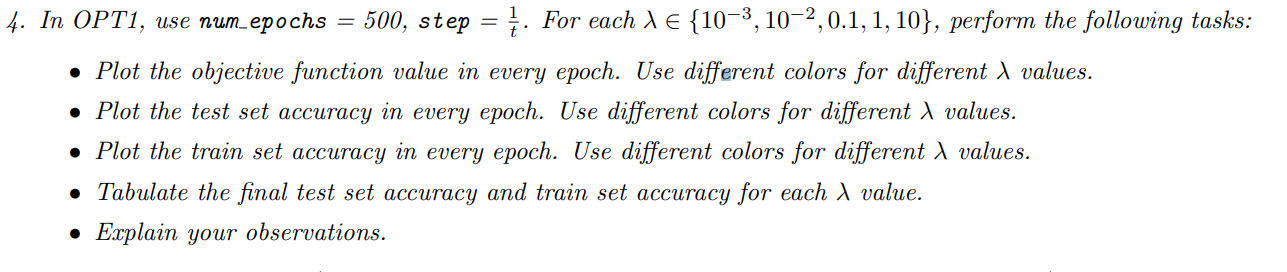

In [7]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np.zeros((d,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  for epoch in range(num_epochs) :
    np.random.shuffle(arr) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      w = w-step*grad_loss(X[i], y[i], w, lamda,n)
      w=compute_orthogonal_projection(w,lamda)
      t=t+1
      if t > 1e4 :
        t = 1
    obj_fn.append(obj_func(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(calculate_accuracy(X,y,w))
    accuracy_test.append(calculate_accuracy(test_data,test_label,w))

  return w ,obj_fn,value_of_w,accuracy_train,accuracy_test

In [8]:
num_epoch = 500
lamda = [1e-3,1e-2,0.1,1,10]
obj_func_lst = []
test_acc_lst = []
train_acc_lst = []

for lam in lamda:
  #val = OPT1(train_data,train_label,lam,num_epoch)
  obj_func_lst.append(OPT1(train_data,train_label,lam,num_epoch)[1])
  test_acc_lst.append(OPT1(train_data,train_label,lam,num_epoch)[4])
  train_acc_lst.append(OPT1(train_data,train_label,lam,num_epoch)[3])

<ipython-input-6-72c08c9c5298>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(abs(z[i]) for i in range(length))


##**Plot of objective function value in every epoch.**

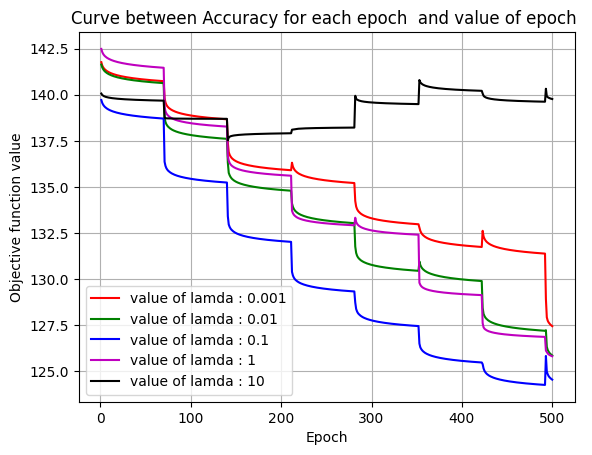

In [9]:
plt.plot([i for i in range(1,501)],obj_func_lst[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],obj_func_lst[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],obj_func_lst[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],obj_func_lst[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],obj_func_lst[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Objective function value')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()


#**OBSERVATION**

Here it can be seen that the lowest objective function value is achieved by using lamda = 0.1 and lamda = 10 gives the least efficient objective function value


##**Plot of test set accuracy in every epoch**

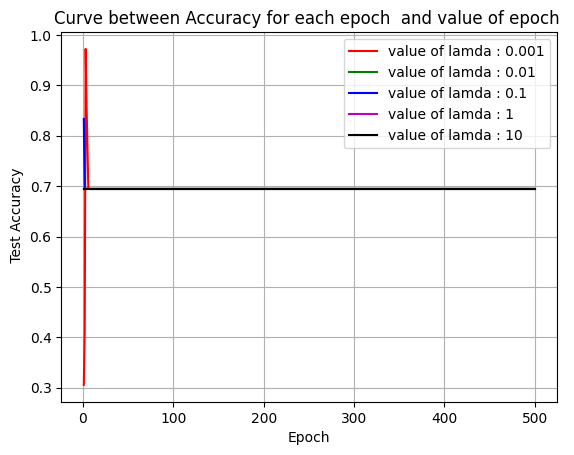

In [ ]:
plt.plot([i for i in range(1,501)],test_acc_lst[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],test_acc_lst[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],test_acc_lst[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],test_acc_lst[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],test_acc_lst[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Test Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

#**OBSERVATION**
The accuracy of the test dataset seems to be highest at the lowest epoch value i.e 0.001 but eventually after 500 epoch values it comes down to 0.61 equal to  every other accuracy.

##**Plot the train set accuracy in every epoch.**

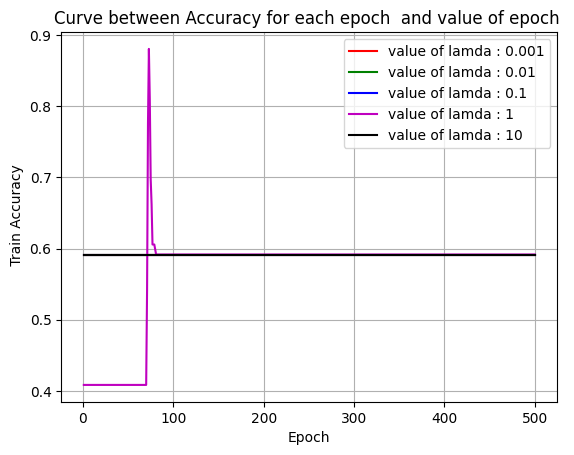

In [10]:
plt.plot([i for i in range(1,501)],train_acc_lst[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],train_acc_lst[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],train_acc_lst[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],train_acc_lst[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],train_acc_lst[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Train Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

#**OBSERVATION**
 The accuracy of the test dataset seems to be highest at epoch value i.e 0.1 and 0.01 but eventually after 500 epoch values it comes down to 0.61 equal to  every other accuracy.

In [11]:
from prettytable import PrettyTable
#Table for train and test accuracy
table=PrettyTable(['lambda_values','Train accuracy','Test accuracy'])
table.add_row(['0.001',train_acc_lst[0][-1],test_acc_lst[0][-1]])
table.add_row(['0.01',train_acc_lst[1][-1],test_acc_lst[1][-1]])
table.add_row(['0.1',train_acc_lst[2][-1],test_acc_lst[2][-1]])
table.add_row(['1',train_acc_lst[3][-1],test_acc_lst[3][-1]])
table.add_row(['10',train_acc_lst[4][-1],test_acc_lst[4][-1]])
print(table)


+---------------+--------------------+--------------------+
| lambda_values |   Train accuracy   |   Test accuracy    |
+---------------+--------------------+--------------------+
|     0.001     | 0.5915492957746479 | 0.6388888888888888 |
|      0.01     | 0.5915492957746479 | 0.6388888888888888 |
|      0.1      | 0.5915492957746479 | 0.6388888888888888 |
|       1       | 0.5915492957746479 | 0.6388888888888888 |
|       10      | 0.5915492957746479 | 0.6388888888888888 |
+---------------+--------------------+--------------------+


#**Logistic**
##**$L_l(y_i
, w^T x_i) = log(1 + exp(−y_iw
^T x_i))$**

In [12]:
def logistic_loss(x,y,w):

  return np.log(1+np.exp(-y * w @ x))

def logistic_obj_func(x,y,w,lamda):
    n=x.shape[0]
    loss=0
    for i in range(n):
      loss=loss+logistic_loss(x[i],y[i],w)
    reg_term=1/2*lamda*((np.linalg.norm(w))**2)
    obj=reg_term+loss/n
    return obj
def logistic_grad(x,y,w,lamda,n):
  reg_term=(lamda/n)*w
  loss_term=(1/n)*y*x*(1/(1+np.exp(y*(w@x))))
  return reg_term-loss_term

In [13]:
def OPT1( data , y_label ,lamda ,num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np.zeros((d,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  for epoch in range(num_epochs) :
    np.random.shuffle(arr) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      w = w-step*logistic_grad(X[i], y[i], w, lamda,n)
      w=compute_orthogonal_projection(w,lamda)
      t=t+1
      if t > 1e4 :
        t = 1
    obj_fn.append(logistic_obj_func(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(calculate_accuracy(X,y,w))
    accuracy_test.append(calculate_accuracy(test_data,test_label,w))

  return w ,obj_fn,value_of_w,accuracy_train,accuracy_test

In [14]:
num_epoch = 500
lamda = [1e-3,1e-2,0.1,1,10]
obj_func_lst1 = []
test_acc_lst1 = []
train_acc_lst1 = []

for lam in lamda:
  obj_func_lst1.append(OPT1(train_data,train_label,lam,num_epoch)[1])
  test_acc_lst1.append(OPT1(train_data,train_label,lam,num_epoch)[4])
  train_acc_lst1.append(OPT1(train_data,train_label,lam,num_epoch)[3])

<ipython-input-6-72c08c9c5298>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(abs(z[i]) for i in range(length))


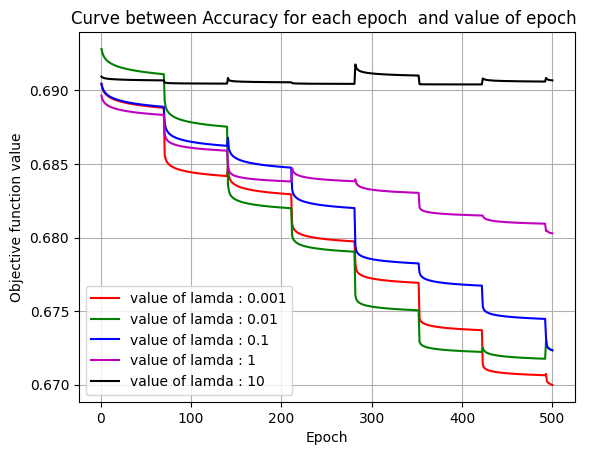

In [15]:
plt.plot([i for i in range(1,501)],obj_func_lst1[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],obj_func_lst1[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],obj_func_lst1[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],obj_func_lst1[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],obj_func_lst1[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Objective function value')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

#**OBSERVATION**

Here it can be seen that the lowest objective function value is achieved by using lamda = 0.1 whereas lamda = 10 gives the least efficient objective function value


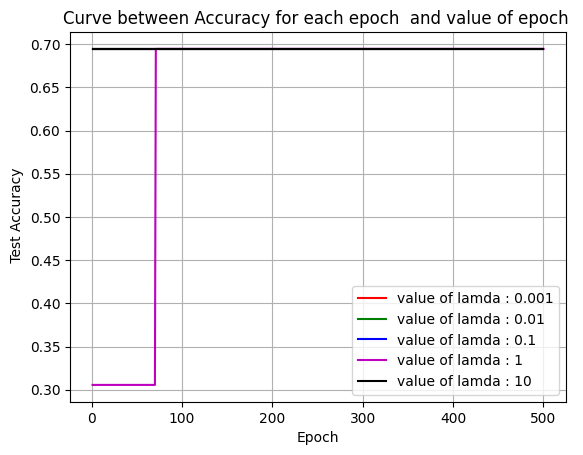

In [ ]:
plt.plot([i for i in range(1,501)],test_acc_lst1[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],test_acc_lst1[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],test_acc_lst1[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],test_acc_lst1[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],test_acc_lst1[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Test Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

#**OBSERVATION**
Here for lamda = 1, the test accuracy increases from 0.31 to 0.69 and for others it remains constant at 0.69




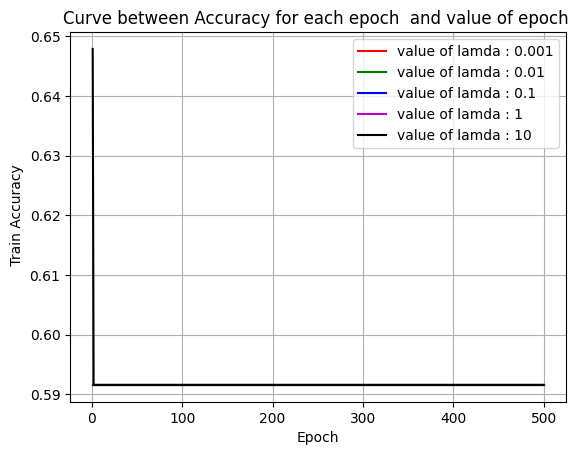

In [16]:
plt.plot([i for i in range(1,501)],train_acc_lst1[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],train_acc_lst1[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],train_acc_lst1[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],train_acc_lst1[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],train_acc_lst1[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Train Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

#**OBSERVATION**

For all the lamda values the accuracy remains constant i.e
 0.591

In [17]:
table1 =PrettyTable(['lambda_values','Train accuracy','Test accuracy'])
table1.add_row(['0.001',train_acc_lst1[0][-1],test_acc_lst1[0][-1]])
table1.add_row(['0.01',train_acc_lst1[1][-1],test_acc_lst1[1][-1]])
table1.add_row(['0.1',train_acc_lst1[2][-1],test_acc_lst1[2][-1]])
table1.add_row(['1',train_acc_lst1[3][-1],test_acc_lst1[3][-1]])
table1.add_row(['10',train_acc_lst1[4][-1],test_acc_lst1[4][-1]])
print(table1)

+---------------+--------------------+--------------------+
| lambda_values |   Train accuracy   |   Test accuracy    |
+---------------+--------------------+--------------------+
|     0.001     | 0.5915492957746479 | 0.6388888888888888 |
|      0.01     | 0.5915492957746479 | 0.6388888888888888 |
|      0.1      | 0.5915492957746479 | 0.6388888888888888 |
|       1       | 0.5915492957746479 | 0.6388888888888888 |
|       10      | 0.5915492957746479 | 0.6388888888888888 |
+---------------+--------------------+--------------------+


# Squared Hinge
##**$L_{sh}(y_i, w^T x_i)$ = (max{$0, 1 − y_iw^T x_i$}$)^2$**

In [18]:
def sq_hinge(x,y,w):
  return np.maximum(0,1- y*(w@x))**2

def obj_sq_hinge(X,y,w,lamda):
  n = X.shape[0]
  loss = 0
  for i in range(n):
    loss = loss + sq_hinge(X[i],y[i],w)

  reg_term=1/2*lamda*((np.linalg.norm(w))**2)
  obj = reg_term + loss/n
  return obj

def squared_gradient(x,y,w,lamda,n):
  reg_term=(lamda/n)*w
  z=y*(w@x)
  grad=0

  if (1-z)>0:
    grad=-2*(1-z)*y*x
  gradient=reg_term+grad/n
  return gradient

In [19]:
def sq_hinge_OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np.zeros((d,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  for epoch in range(num_epochs) :
    np.random.shuffle(arr) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      w = w-step* squared_gradient(X[i], y[i], w, lamda,n)
      w=compute_orthogonal_projection(w,lamda)
      t=t+1
      if t > 1e4 :
        t = 1
    obj_fn.append(obj_sq_hinge(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(calculate_accuracy(X,y,w))
    accuracy_test.append(calculate_accuracy(test_data,test_label,w))

  return w ,obj_fn,value_of_w,accuracy_train,accuracy_test

In [20]:
num_epoch = 500
lamda = [1e-3,1e-2,0.1,1,10]
obj_func_lst2 = []
test_acc_lst2 = []
train_acc_lst2 = []

for lam in lamda:
  obj_func_lst2.append(sq_hinge_OPT1(train_data,train_label,lam,num_epoch)[1])
  test_acc_lst2.append(sq_hinge_OPT1(train_data,train_label,lam,num_epoch)[4])
  train_acc_lst2.append(sq_hinge_OPT1(train_data,train_label,lam,num_epoch)[3])

<ipython-input-6-72c08c9c5298>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(abs(z[i]) for i in range(length))


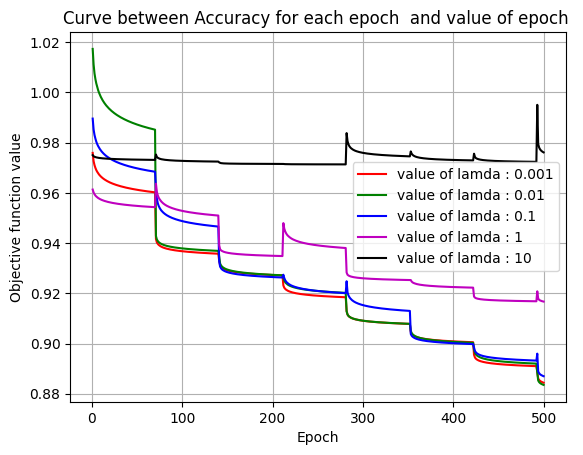

In [23]:
plt.plot([i for i in range(1,501)],obj_func_lst2[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],obj_func_lst2[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],obj_func_lst2[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],obj_func_lst2[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],obj_func_lst2[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Objective function value')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

#**OBSERVATION**

Here it can be seen that the lowest objective function value is achieved by using lamda = 0.1,0.01,0.001 and lamda = 10 gives the least efficient objective function value.


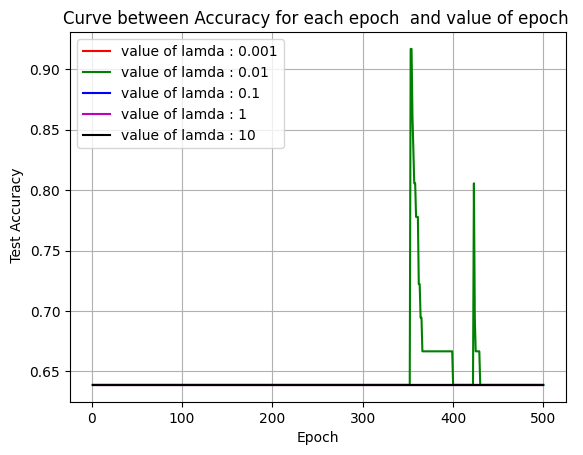

In [24]:
plt.plot([i for i in range(1,501)],test_acc_lst2[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],test_acc_lst2[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],test_acc_lst2[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],test_acc_lst2[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],test_acc_lst2[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Test Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

#**OBSERVATION**
The highest test accuracy is achieved at lamda = 0.01 but it eventually becomes
0.63 after the final epoch and for other lamda values it remains constant


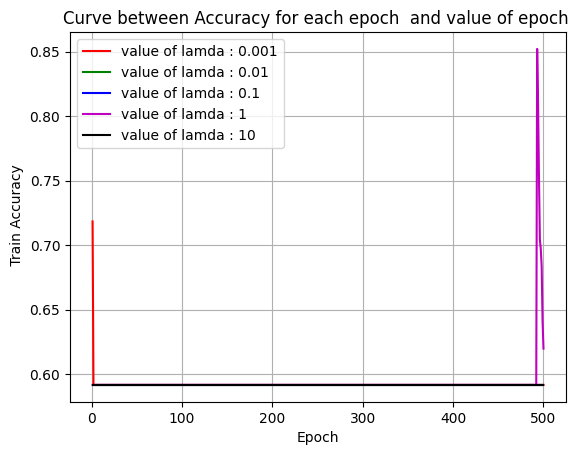

In [25]:
plt.plot([i for i in range(1,501)],train_acc_lst2[0],color = 'red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],train_acc_lst2[1],color = 'g',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],train_acc_lst2[2],color = 'b',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],train_acc_lst2[3],color = 'm',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],train_acc_lst2[4],color = 'k',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(' Train Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

#**OBSERVATION**
The highest test accuracy is achieved at lamda = 0.01 but it eventually becomes
0.59 after the final epoch and for other lamda values it remains constant

In [26]:
table2 =PrettyTable(['lambda_values','Train accuracy','Test accuracy'])
table2.add_row(['0.001',train_acc_lst2[0][-1],test_acc_lst2[0][-1]])
table2.add_row(['0.01',train_acc_lst2[1][-1],test_acc_lst2[1][-1]])
table2.add_row(['0.1',train_acc_lst2[2][-1],test_acc_lst2[2][-1]])
table2.add_row(['1',train_acc_lst2[3][-1],test_acc_lst2[3][-1]])
table2.add_row(['10',train_acc_lst2[4][-1],test_acc_lst2[4][-1]])
print(table2)

+---------------+--------------------+--------------------+
| lambda_values |   Train accuracy   |   Test accuracy    |
+---------------+--------------------+--------------------+
|     0.001     | 0.5915492957746479 | 0.6388888888888888 |
|      0.01     | 0.5915492957746479 | 0.6388888888888888 |
|      0.1      | 0.5915492957746479 | 0.6388888888888888 |
|       1       | 0.6197183098591549 | 0.6388888888888888 |
|       10      | 0.5915492957746479 | 0.6388888888888888 |
+---------------+--------------------+--------------------+
